In [1]:
from matplotlib import pyplot as plt

In [2]:
fft_length =32768
sample_rate=48000

def bin_for_freq(freq):
    return int(
            round(
                (float(fft_length)/float(sample_rate)) * freq
                )
            )


In [5]:
def freqs_of_interest(fundamental, low_harmonic, high_harmonic):
    return [fundamental * harmonic for harmonic in range(low_harmonic, high_harmonic)]

In [6]:
def bins_of_interest(fundamental, low_harmonic, high_harmonic):
    return [bin_for_freq(freq) for freq in freqs_of_interest(fundamental, low_harmonic, high_harmonic)]

In [122]:
def sign(x):
    return (x > 0) - (x < 0)

def shape(n_bins, slope=0.0, tilt=0.0):
    slope_coeffs = [max(0, 2 ** (-i/slope)) for i in range(0, n_bins)]
    tilt_coeffs = [ 1 - max(0, sign(tilt)) * abs(tilt) * (i % 2) - (1-max(0, sign(tilt))) * abs(tilt) * (1 - i % 2) for i in range(0, n_bins)]
    return [s*t for (s, t) in zip(slope_coeffs, tilt_coeffs)]

In [123]:
def f(x, fundamental, low_harmonic, high_harmonic, slope=0.0, tilt=0.0):
    bins = bins_of_interest(fundamental, low_harmonic, high_harmonic)
    shapes = dict(zip(bins, shape(len(bins), slope, tilt)))
    if x in bins:
        return shapes[x]
    else:
        return 0
        

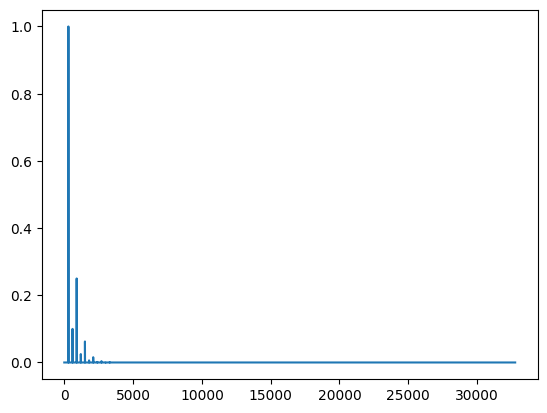

In [129]:
fft = [f(i, fundamental=440, low_harmonic=1, high_harmonic=20, slope=1.0, tilt=0.8) for i in range(0, fft_length)]
plt.plot(fft)